In [409]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [410]:
# Read housing data
data = pd.read_csv('housing.csv')

In [411]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


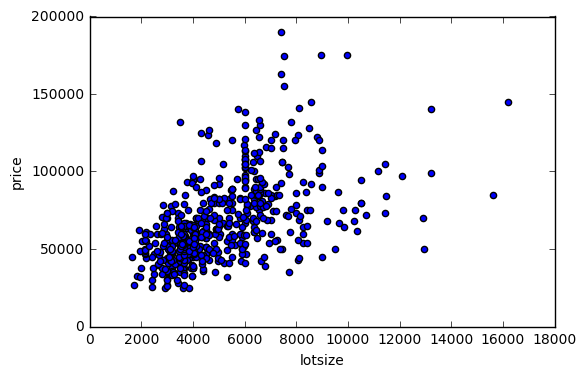

In [412]:
# Plot the data
data.plot(kind='scatter', x = 'lotsize', y = 'price')

In [413]:
# Seperate the data to inputs and output
X = data[['lotsize', 'bedrooms']].copy()
y = data[['price']].copy()

# Normalize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Insert column of ones for bias theta
X.insert(0, 'Ones',1)

In [414]:
# Convert to numpy arrays
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(X.shape[1]))

In [415]:
# Matrix and vector info for data
print(X.shape)
print(y.shape)
print(theta.shape)

(546, 3)
(546, 1)
(1, 3)


In [416]:
# Cost function
def costfunction(X,y,theta):
    pred = np.power(((X * theta.T)-y),2)
    return np.sum(pred)/(2 * len(X))

def gradientDescent(X, y, theta, iters, alpha = 0.01):
    temp = theta
    num_parameters = int(theta.shape[1])
    cost_history = []
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(num_parameters):
            term = np.multiply(error, X[:,j])
            step = ((alpha / len(X)) * np.sum(term))
            temp[0,j] = theta[0,j] - step
        theta = temp
        cost_history.append(costfunction(X, y, theta))
        
    return theta, cost_history

In [420]:
print('Initial error loss: ' + str(costfunction(X,y,theta)))

Initial error loss: 0.499084249084


In [395]:
# Hyperparameter
iters = 1000

In [396]:
final_theta, error_loss = gradientDescent(X,y,theta,iters)

In [421]:
print('Final error loss: ' + str(costfunction(X,y, final_theta)))

Final error loss: 0.31428865191


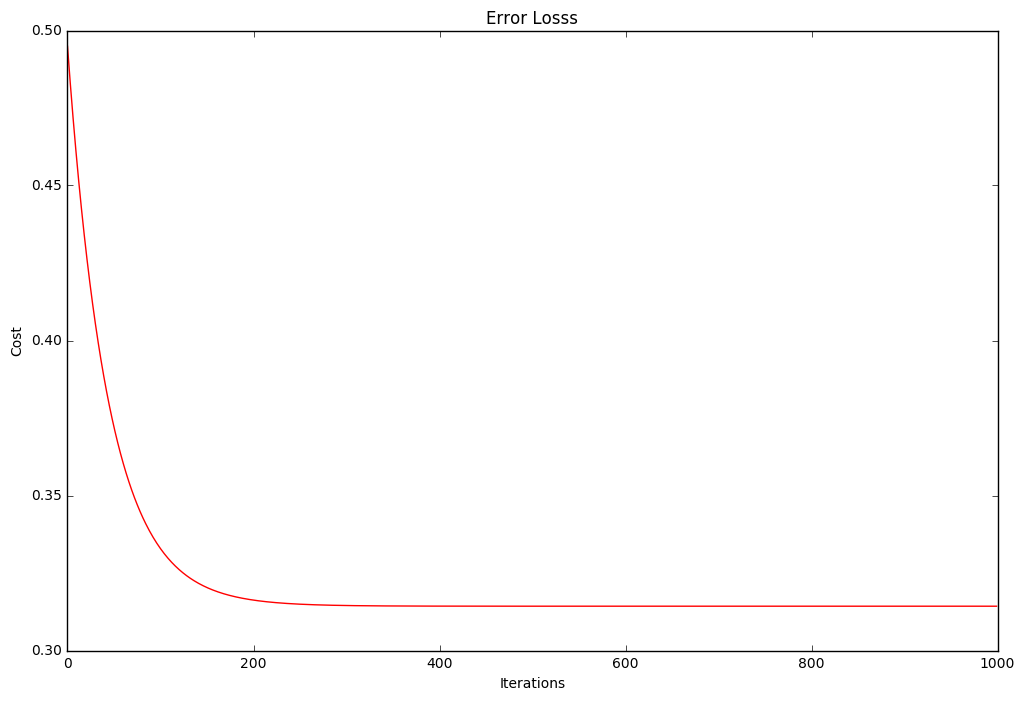

In [422]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), error_loss, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Losss')

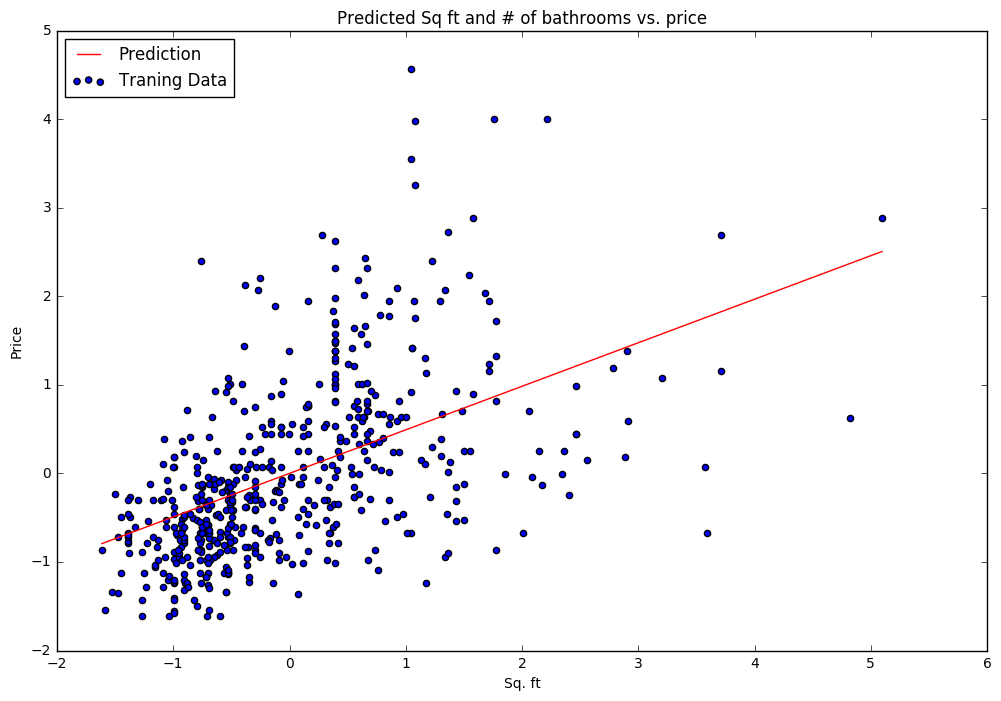

In [423]:
x = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
f = final_theta[0, 0] + (final_theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(X[:,1], y[:,0], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Sq. ft')
ax.set_ylabel('Price')
ax.set_title('Predicted Sq ft and # of bathrooms vs. price')